In [7]:
import mysql.connector
import re
import random
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from collections import defaultdict
from scipy import stats
import networkx as nx
import pandas as pd
import numpy as np

In [7]:
# give each character a certain amount of xp

db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}

connection = mysql.connector.connect(**db_config)
cursor = connection.cursor()

# Player IDs to update
player_ids = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
    11, 12, 13, 14, 16, 17, 19, 21, 22, 23,
    25, 26, 28, 30, 31, 32, 33, 35, 36, 38,
    39, 40, 41, 42, 43, 44, 46, 47, 48, 50,
    51, 52, 53, 55, 56, 58, 60, 62, 63, 64,
    66, 67, 69, 70, 71, 72, 74, 75, 77, 78,
    80, 81, 82, 83, 85, 87, 89, 90, 93, 95,
    96, 97, 98, 100, 101, 102, 103, 105, 106,
    107, 109, 110, 112, 113, 114, 116, 119, 120,
    122, 123, 124, 125, 127, 128, 129, 130, 131, 132,
    133, 134, 135, 137, 138, 140, 142, 145, 148, 149,
    150, 152, 154, 155, 156, 157, 158, 161, 164, 167,
    170, 172, 173, 175, 176, 179, 182, 184, 187, 190,
    191, 192, 193, 196, 199, 202, 204, 206, 208, 209,
    211, 212, 213, 214, 215, 217, 220, 221, 224, 225,
    226, 229, 232, 234, 235, 237, 238, 239, 241, 243,
    246, 247, 249, 252, 255, 258, 261, 263, 264, 265,
    268, 270, 272, 275, 277, 279, 281, 991
]

# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Generate and execute the SQL update statements
for player_id in player_ids:
    xp_value = random.randint(0, 260000)
    update_query = f"UPDATE characters SET xp = {xp_value} WHERE player_id = {player_id}"
    cursor.execute(update_query)
    print(f"Updated player {player_id} with XP: {xp_value}")

# Commit the changes and close the connection
conn.commit()
conn.close()

Updated player 1 with XP: 82126
Updated player 2 with XP: 175212
Updated player 3 with XP: 217094
Updated player 4 with XP: 162660
Updated player 5 with XP: 30441
Updated player 6 with XP: 61141
Updated player 7 with XP: 126225
Updated player 8 with XP: 113316
Updated player 9 with XP: 163557
Updated player 10 with XP: 125409
Updated player 11 with XP: 54019
Updated player 12 with XP: 99503
Updated player 13 with XP: 256107
Updated player 14 with XP: 76823
Updated player 16 with XP: 161990
Updated player 17 with XP: 187549
Updated player 19 with XP: 169625
Updated player 21 with XP: 99320
Updated player 22 with XP: 21706
Updated player 23 with XP: 10199
Updated player 25 with XP: 177819
Updated player 26 with XP: 37188
Updated player 28 with XP: 200898
Updated player 30 with XP: 245364
Updated player 31 with XP: 149481
Updated player 32 with XP: 245623
Updated player 33 with XP: 148745
Updated player 35 with XP: 180442
Updated player 36 with XP: 47541
Updated player 38 with XP: 211583


In [8]:
#update the player levels based on their XP amount


db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}


# Function to calculate the level based on XP
def calculate_level(xp):
    level = 1
    xp_required = 1000  # Initial XP requirement

    while xp >= xp_required:
        level += 1
        if level <= 10:
            xp_required += 1000
        elif level <= 20:
            xp_required += 2500
        elif level <= 30:
            xp_required += 5000
        elif level <= 40:
            xp_required += 7500
        else:
            xp_required += 10000

    return level

# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Retrieve player IDs and XP values from the "characters" table
select_query = "SELECT player_id, xp FROM characters"
cursor.execute(select_query)
player_data = cursor.fetchall()

# Update the "level" column for each player
update_query = "UPDATE characters SET level = %s WHERE player_id = %s"
for player_id, xp in player_data:
    level = calculate_level(xp)
    cursor.execute(update_query, (level, player_id))
    print(f"Updated player {player_id} to level {level} with XP: {xp}")

# Commit the changes and close the connection
conn.commit()
conn.close()

Updated player 51 to level 43 with XP: 188312
Updated player 1 to level 30 with XP: 82126
Updated player 70 to level 44 with XP: 196031
Updated player 55 to level 37 with XP: 132288
Updated player 3 to level 46 with XP: 217094
Updated player 53 to level 50 with XP: 252314
Updated player 7 to level 36 with XP: 126225
Updated player 54 to level 7 with XP: 6500
Updated player 54 to level 8 with XP: 7258
Updated player 29 to level 7 with XP: 6800
Updated player 56 to level 36 with XP: 123929
Updated player 57 to level 3 with XP: 2000
Updated player 8 to level 34 with XP: 113316
Updated player 40 to level 37 with XP: 130202
Updated player 7 to level 36 with XP: 126225
Updated player 2 to level 42 with XP: 175212
Updated player 23 to level 11 with XP: 10199
Updated player 25 to level 42 with XP: 177819
Updated player 9 to level 41 with XP: 163557
Updated player 8 to level 34 with XP: 113316
Updated player 10 to level 36 with XP: 125409
Updated player 47 to level 18 with XP: 29323
Updated pla

Q1: Level Distribution: Examine the distribution of player levels to understand the balance between newcomers, mid-level, and high-level players.

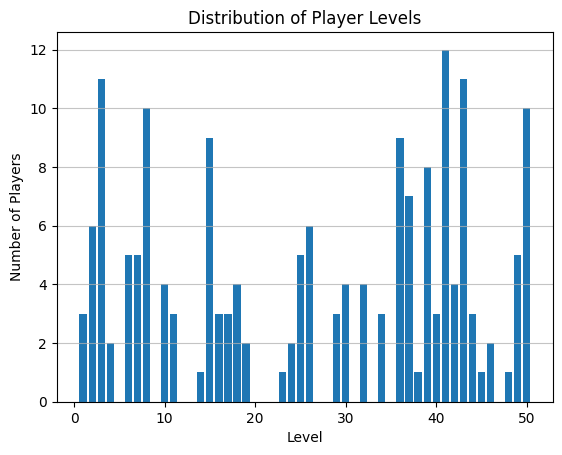

In [9]:


db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}


# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Retrieve player levels from the "characters" table
select_query = "SELECT level FROM characters"
cursor.execute(select_query)
player_levels = cursor.fetchall()

# Flatten the list of player levels
player_levels = [level[0] for level in player_levels]

# Create a histogram to visualize the distribution of levels
plt.hist(player_levels, bins=range(1, max(player_levels) + 2), align="left", rwidth=0.8)
plt.xlabel("Level")
plt.ylabel("Number of Players")
plt.title("Distribution of Player Levels")
plt.grid(axis="y", alpha=0.75)
plt.show()

# Close the database connection
conn.close()

In [10]:

db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}

# Define the SQL statements to create the "trade" table
create_table_sql = """
CREATE TABLE trade (
    TradeID INT NOT NULL PRIMARY KEY,
    SellerID INT NULL,
    BuyerID INT NULL,
    ItemID INT NULL,
    Price INT NULL,
    Offered DATETIME NULL,
    Accepted DATETIME NULL,
    CONSTRAINT trade_ibfk_1 FOREIGN KEY (SellerID) REFERENCES characters(id),
    CONSTRAINT trade_ibfk_2 FOREIGN KEY (BuyerID) REFERENCES characters(id),
    CONSTRAINT trade_ibfk_3 FOREIGN KEY (ItemID) REFERENCES item(id)
);
"""

create_index_sql = [
    "CREATE INDEX BuyerID ON trade (BuyerID);",
    "CREATE INDEX ItemID ON trade (ItemID);",
    "CREATE INDEX SellerID ON trade (SellerID);"
]

# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Execute the SQL statements to create the "trade" table and indexes
cursor.execute(create_table_sql)
for index_sql in create_index_sql:
    cursor.execute(index_sql)

# Commit the changes and close the connection
conn.commit()
conn.close()

ProgrammingError: 1050 (42S01): Table 'trade' already exists

In [ ]:
#update player gold distribution --> initial gold

db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}

# Function to calculate the gold amount based on the given formula
def calculate_gold(level):
    xx = random.randint(1, 9)
    return 10000 + (1 + xx / 100) * level * 1000

# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Retrieve player IDs and levels from the "characters" table
select_query = "SELECT id, level FROM characters"
cursor.execute(select_query)
player_data = cursor.fetchall()

# Update the "gold" column for each player
update_query = "UPDATE characters SET gold = %s WHERE id = %s"
for player_id, level in player_data:
    gold = calculate_gold(level)
    cursor.execute(update_query, (gold, player_id))
    print(f"Updated player {player_id} with gold: {gold}")

# Commit the changes and close the connection
conn.commit()
conn.close()

Updated player 1 with gold: 58150.00000000001
Updated player 2 with gold: 55780.0
Updated player 3 with gold: 48110.0
Updated player 4 with gold: 46750.0
Updated player 5 with gold: 49900.0
Updated player 6 with gold: 57960.0
Updated player 7 with gold: 56010.00000000001
Updated player 8 with gold: 18240.0
Updated player 9 with gold: 18240.0
Updated player 10 with gold: 17490.0
Updated player 11 with gold: 60760.00000000001
Updated player 12 with gold: 18720.0
Updated player 13 with gold: 60470.0
Updated player 14 with gold: 60880.0
Updated player 16 with gold: 53860.0
Updated player 17 with gold: 59440.0
Updated player 19 with gold: 56800.00000000001
Updated player 21 with gold: 42400.00000000001
Updated player 22 with gold: 52510.00000000001
Updated player 23 with gold: 63410.00000000001
Updated player 25 with gold: 46400.0
Updated player 26 with gold: 32680.0
Updated player 28 with gold: 45700.0
Updated player 30 with gold: 13210.0
Updated player 31 with gold: 13120.0
Updated player

In [ ]:
#create item_ownership table

db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}


# Define the SQL statement to create the "character_item_ownership" table
create_table_sql = """
CREATE TABLE character_item_ownership (
    character_id INT,
    item_id INT,
    quantity INT,
    PRIMARY KEY (character_id, item_id),
    FOREIGN KEY (character_id) REFERENCES characters(id),
    FOREIGN KEY (item_id) REFERENCES item(id)
);
"""

# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Execute the SQL statement to create the table
cursor.execute(create_table_sql)

# Commit the changes and close the connection
conn.commit()
conn.close()

In [13]:
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}

# List of character IDs and item IDs
character_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 21, 22, 23, 25, 26, 28, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 50, 51, 52, 53, 55, 56, 58, 60, 62, 63, 64, 66, 67, 69, 70, 71, 72, 74, 75, 77, 78, 80, 81, 82, 83, 85, 87, 89, 90, 93, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 109, 110, 112, 113, 114, 116, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 140, 142, 145, 148, 149, 150, 152, 154, 155, 156, 157, 158, 161, 164, 167, 170, 172, 173, 175, 176, 179, 182, 184, 187, 190, 191, 192, 193, 196, 199, 202, 204, 206, 208, 209, 211, 212, 213, 214, 215, 217, 220, 221, 224, 225, 226, 229, 232, 234, 235, 237, 238, 239, 241, 243, 246, 247, 249, 252, 255, 258, 261, 263, 264, 265, 268, 270, 272, 275, 277, 279, 281, 991]
item_ids = [2, 3, 4, 5, 8, 9, 10, 13, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 43, 45, 46, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 75, 76, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 99, 101, 104, 105, 106, 108, 111, 113, 114, 115, 116, 118, 119, 121, 123, 124, 125, 126, 127, 130, 133, 135, 136, 137, 138, 140, 142, 143, 145, 146, 147, 148, 149, 151, 152, 153, 155, 157, 160, 163, 165, 166, 168, 169, 171, 174, 176, 177, 178, 180, 181, 182, 184, 185, 186, 187, 188, 189]

# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Define SQL INSERT statement
insert_query = "INSERT IGNORE INTO character_item_ownership (character_id, item_id, quantity) VALUES (%s, %s, %s)"

# Populate the table with data for each character and item combination
for character_id in character_ids:
    for item_id in item_ids:
        quantity = random.randint(0, 3)  
        cursor.execute(insert_query, (character_id, item_id, quantity))

# Commit the changes and close the connection
conn.commit()
conn.close()

In [4]:
#add the item_worth column to the item table

db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}

# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Step 1: Add the new column
#add_column_query = "ALTER TABLE item ADD item_worth INT"
#cursor.execute(add_column_query)
#conn.commit()

# Step 2: Update item_worth based on rarity
update_query = """
    UPDATE item
    SET item_worth =
        CASE
            WHEN rarity = 'common' THEN FLOOR(RAND() * 10) * 100 + 100
            WHEN rarity = 'rare' THEN FLOOR(RAND() * 15) * 100 + 1000
            WHEN rarity = 'mythic' THEN FLOOR(RAND() * 25) * 100 + 2500
            WHEN rarity = 'legendary' THEN FLOOR(RAND() * 50) * 100 + 5000
            ELSE 0
        END;
"""
cursor.execute(update_query)
conn.commit()

# Close the database connection
conn.close()

In [11]:
#adding trading data here. i executed this multiple times with different values. also it updates the player gold and items posessions


# Replace with your MySQL database credentials
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}

# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()


# List of player IDs and item IDs
player_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 21, 22, 23, 25, 26, 28, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 50, 51, 52, 53, 55, 56, 58, 60, 62, 63, 64, 66, 67, 69, 70, 71, 72, 74, 75, 77, 78, 80, 81, 82, 83, 85, 87, 89, 90, 93, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 109, 110, 112, 113, 114, 116, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 140, 142, 145, 148, 149, 150, 152, 154, 155, 156, 157, 158, 161, 164, 167, 170, 172, 173, 175, 176, 179, 182, 184, 187, 190, 191, 192, 193, 196, 199, 202, 204, 206, 208, 209, 211, 212, 213, 214, 215, 217, 220, 221, 224, 225, 226, 229, 232, 234, 235, 237, 238, 239, 241, 243, 246, 247, 249, 252, 255, 258, 261, 263, 264, 265, 268, 270, 272, 275, 277, 279, 281, 991]
item_ids = [2, 3, 4, 5, 8, 9, 10, 13, 15, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 36, 38, 39, 40, 41, 42, 43, 45, 46, 48, 49, 50, 51, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 75, 76, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 99, 101, 104, 105, 106, 108, 111, 113, 114, 115, 116, 118, 119, 121, 123, 124, 125, 126, 127, 130, 133, 135, 136, 137, 138, 140, 142, 143, 145, 146, 147, 148, 149, 151, 152, 153, 155, 157, 160, 163, 165, 166, 168, 169, 171, 174, 176, 177, 178, 180, 181, 182, 184, 185, 186, 187, 188, 189]

# Iterate through trade transactions
for _ in range(1000):  # Change the number of trades as needed
    seller_id = random.choice(player_ids)
    buyer_id = random.choice(player_ids)
    item_id = random.choice(item_ids)

    # Check if seller has the item and buyer has enough gold
    check_query = """
        SELECT c.gold, i.item_worth
        FROM characters c
        JOIN item i ON i.id = %s
        WHERE c.id = %s;
    """
    cursor.execute(check_query, (item_id, seller_id))
    seller_data = cursor.fetchone()
    
    cursor.execute(check_query, (item_id, buyer_id))
    buyer_data = cursor.fetchone()

    start_date = datetime(2023, 1, 1)
    end_date = datetime(2023, 3, 9)

    if seller_data and buyer_data:
        item_worth = seller_data[1]
        if buyer_data[0] >= item_worth:
            # Calculate trade price
            price = random.uniform(0.95, 1.2) * item_worth

            # Generate random dates
            offered_date = start_date + timedelta(days=random.randint(0, (end_date - start_date).days))
            accepted_date = offered_date + timedelta(days=random.randint(1, 7))

            # Update seller's gold
            update_seller_gold_query = "UPDATE characters SET gold = gold + %s WHERE id = %s"
            cursor.execute(update_seller_gold_query, (price, seller_id))

            # Update buyer's gold
            update_buyer_gold_query = "UPDATE characters SET gold = gold - %s WHERE id = %s"
            cursor.execute(update_buyer_gold_query, (price, buyer_id))

            # Update item ownership for buyer and seller
            update_item_owner_query = "INSERT INTO character_item_ownership (character_id, item_id, quantity) VALUES (%s, %s, %s) ON DUPLICATE KEY UPDATE quantity = quantity + %s"
            cursor.execute(update_item_owner_query, (buyer_id, item_id, 1, 1))
            cursor.execute(update_item_owner_query, (seller_id, item_id, -1, -1))

            # Insert trade record with random dates
            insert_trade_query = "INSERT INTO trade (SellerID, BuyerID, ItemID, Price, Offered, Accepted) VALUES (%s, %s, %s, %s, %s, %s)"
            cursor.execute(insert_trade_query, (seller_id, buyer_id, item_id, price, offered_date, accepted_date))

# Commit the changes and close the connection
conn.commit()
conn.close()

Q2: Inflation Analysis: Track the average value of traded items over time to detect
if the in-game economy is experiencing inflation or deflation.

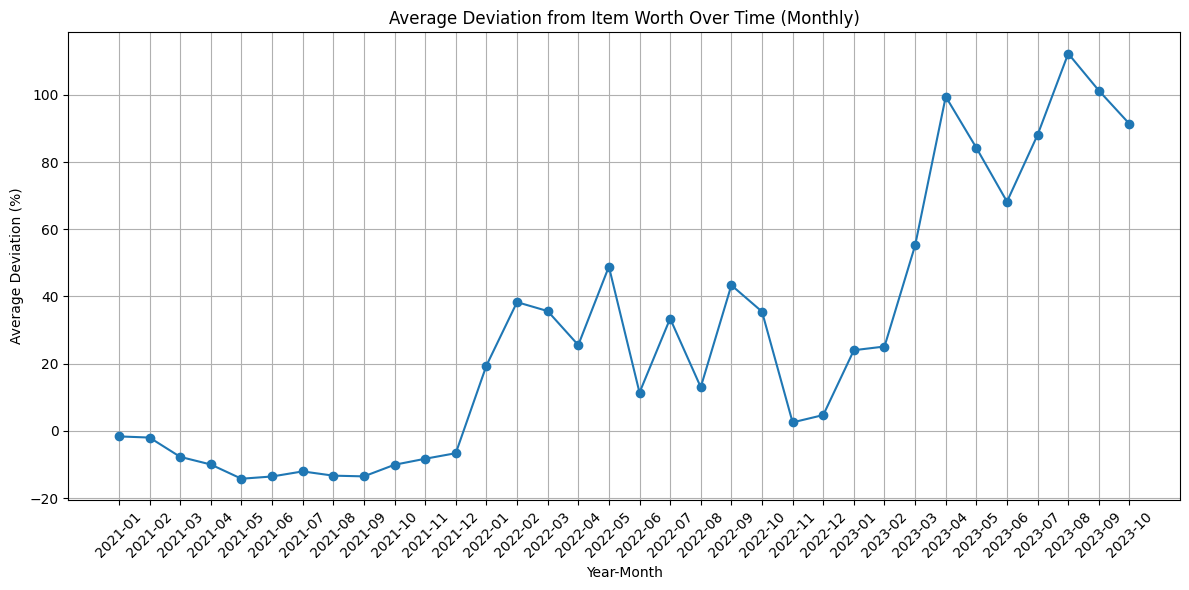

In [12]:
# Replace with your MySQL database credentials
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}

# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Query trade data including Accepted date and Price
query = "SELECT Accepted, Price, ItemID FROM trade WHERE Accepted BETWEEN '2021-01-01' AND '2023-10-17'"
cursor.execute(query)
trade_data = cursor.fetchall()

# Create a dictionary to store monthly average deviation from item_worth
monthly_average_deviation = defaultdict(list)

# Iterate through trade data
for trade in trade_data:
    accepted_date, price, item_id = trade

    # Calculate the deviation from item_worth in percentage
    item_worth_query = "SELECT item_worth FROM item WHERE id = %s"
    cursor.execute(item_worth_query, (item_id,))
    item_worth = cursor.fetchone()[0]

    deviation_percentage = ((price - item_worth) / item_worth) * 100

    # Extract year and month from the accepted date
    year_month = accepted_date.strftime("%Y-%m")

    # Update monthly average deviation
    monthly_average_deviation[year_month].append(deviation_percentage)

# Calculate the monthly average deviation
average_deviations = []
months = []

# Sort the months
sorted_months = sorted(monthly_average_deviation.keys())

for month in sorted_months:
    deviations = monthly_average_deviation[month]
    average_deviation = sum(deviations) / len(deviations)
    months.append(month)
    average_deviations.append(average_deviation)

# Plot the average deviation from item_worth over time
plt.figure(figsize=(12, 6))
plt.plot(months, average_deviations, marker='o', linestyle='-')
plt.title('Average Deviation from Item Worth Over Time (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Average Deviation (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Close the database connection
conn.close()

--> We can see that there is Inflation!

Q3: Top Traded Items: Identify which items are most commonly traded or sold
in-game, providing insight into what is considered valuable by the community

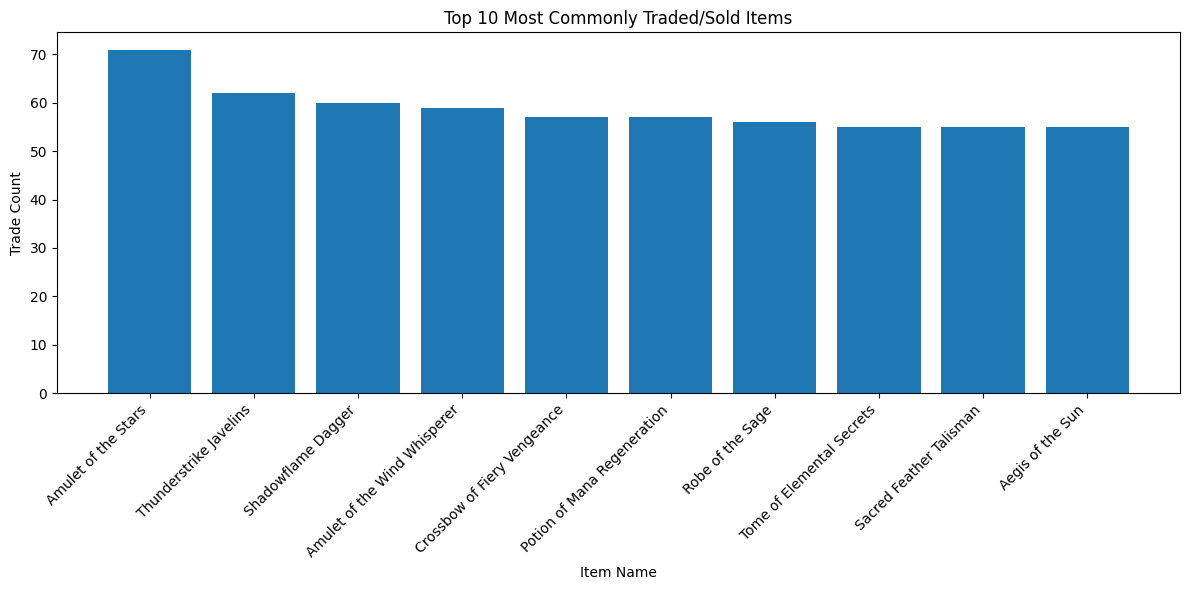

In [13]:

db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}


# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Query trade data including ItemID
query = "SELECT ItemID FROM trade WHERE Accepted BETWEEN '2021-01-01' AND '2023-10-17'"
cursor.execute(query)
trade_data = cursor.fetchall()

# Create a dictionary to store item counts
item_counts = {}

# Count the frequency of each item in trade data
for trade in trade_data:
    item_id = trade[0]

    if item_id in item_counts:
        item_counts[item_id] += 1
    else:
        item_counts[item_id] = 1

# Sort items by trade count in descending order
sorted_items = sorted(item_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top N items with the highest trade counts
top_n = 10  # Change this to the desired number of top items
top_items = sorted_items[:top_n]

# Extract item IDs and trade counts for plotting
item_ids, trade_counts = zip(*top_items)

# Query item names based on item IDs
item_names = []
for item_id in item_ids:
    item_name_query = "SELECT item_name FROM item WHERE id = %s"
    cursor.execute(item_name_query, (item_id,))
    item_name = cursor.fetchone()[0]
    item_names.append(item_name)

# Plot the top N most commonly traded/sold items
plt.figure(figsize=(12, 6))
plt.bar(item_names, trade_counts)
plt.title(f'Top {top_n} Most Commonly Traded/Sold Items')
plt.xlabel('Item Name')
plt.ylabel('Trade Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Close the database connection
conn.close()

Q4: Economic Imbalance: Detect players who have a disproportionate amount of
in-game currency compared to their activity or level, which could be a sign of
economy-unbalancing behavior.

Players with Disproportionate Wealth:
Player ID: 252, Level: 1, Z-Score: 6.4559529430787785
Player ID: 264, Level: 3, Z-Score: 6.198059578301662
Player ID: 81, Level: 1, Z-Score: 6.0640482373571825
Player ID: 134, Level: 4, Z-Score: 4.34958998295862
Player ID: 98, Level: 2, Z-Score: 3.3926191821562774
Player ID: 241, Level: 3, Z-Score: 2.3821603559006683
Player ID: 128, Level: 3, Z-Score: 2.011370283031929


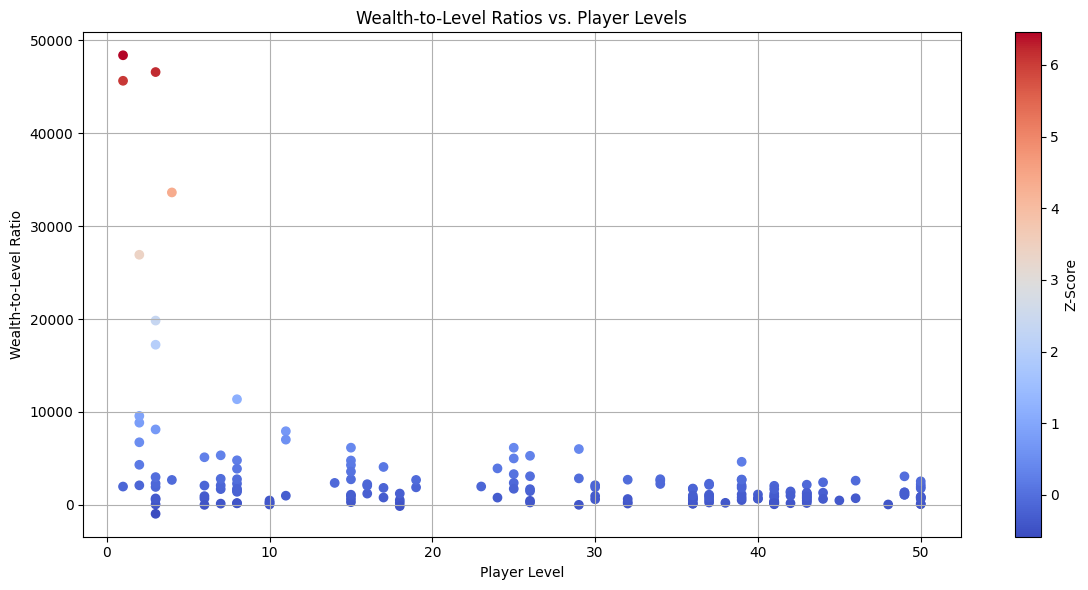

In [15]:
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}


# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Query player data including player ID, level, and gold
query = "SELECT id, level, gold FROM characters"
cursor.execute(query)
player_data = cursor.fetchall()

# Create lists to store player IDs, levels, and wealth-to-level ratios
player_ids = []
player_levels = []
wealth_to_level_ratios = []

# Calculate the wealth-to-level ratio for each player
for player in player_data:
    player_id, level, gold = player
    if level > 0:
        wealth_to_level_ratio = gold / level
        player_ids.append(player_id)
        player_levels.append(level)
        wealth_to_level_ratios.append(wealth_to_level_ratio)

# Calculate z-scores for wealth-to-level ratios
z_scores = stats.zscore(wealth_to_level_ratios)

# Define a threshold for identifying outliers (e.g., z-score > 2)
outlier_threshold = 2

# Identify players with disproportionate wealth
disproportionate_wealth_players = []
for i, z_score in enumerate(z_scores):
    if z_score > outlier_threshold:
        player_id = player_ids[i]
        player_level = player_levels[i]
        disproportionate_wealth_players.append((player_id, player_level, z_score))

# Sort the disproportionate wealth players by z-score in descending order
disproportionate_wealth_players.sort(key=lambda x: x[2], reverse=True)

# Print and visualize the disproportionate wealth players
print("Players with Disproportionate Wealth:")
for player in disproportionate_wealth_players:
    player_id, player_level, z_score = player
    print(f"Player ID: {player_id}, Level: {player_level}, Z-Score: {z_score}")

# Plot the wealth-to-level ratios
plt.figure(figsize=(12, 6))
plt.scatter(player_levels, wealth_to_level_ratios, c=z_scores, cmap='coolwarm')
plt.title('Wealth-to-Level Ratios vs. Player Levels')
plt.xlabel('Player Level')
plt.ylabel('Wealth-to-Level Ratio')
plt.colorbar(label='Z-Score')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Close the database connection
conn.close()

As this was a bit more complex i explain the idea of what i did here: 

In the above script:

1. We query player data, including player ID, level, and gold, from the database.
2. We calculate the wealth-to-level ratio for each player, which represents how much gold a player has per level. (As a measure of economic imbalance)
3. We calculate z-scores for the wealth-to-level ratios to identify outliers.
4. Players with a z-score greater than a specified threshold (e.g., 2) are considered to have disproportionate wealth.
5. We print and visualize the players with disproportionate wealth, and we create a scatter plot to show the distribution of wealth-to-level ratios among all players.

Q5: Trade Partners: Identify frequent trade partnerships between players. Are the
same players often involved in high-value trades with each other?

Frequent Trade Partnerships (High-Value Trades):


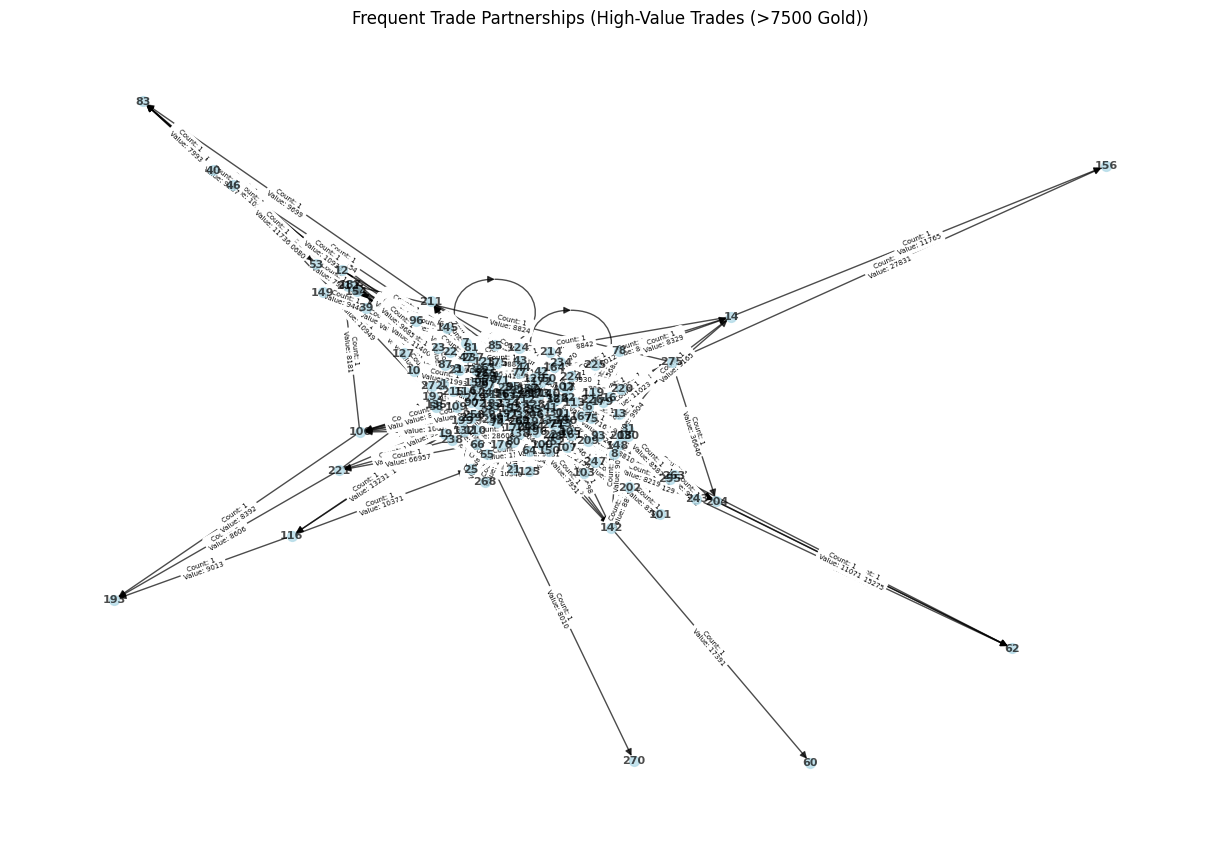

In [29]:
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}

# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Query trade data including seller ID, buyer ID, and trade price
query = "SELECT SellerID, BuyerID, Price FROM trade"
cursor.execute(query)
trade_data = cursor.fetchall()

# Create a directed graph to represent trade partnerships
G = nx.DiGraph()

# Define a threshold for high-value trades (e.g., trades above a certain price)
high_value_threshold = 7500  # Adjust as needed

# Iterate through trade data to build the trade partnerships graph
for trade in trade_data:
    seller_id, buyer_id, price = trade
    if price >= high_value_threshold:
        if G.has_edge(seller_id, buyer_id):
            # If an edge exists, increment the trade count and total trade value
            G[seller_id][buyer_id]['count'] += 1
            G[seller_id][buyer_id]['total_value'] += price
        else:
            # If no edge exists, add a new edge with trade count and total trade value
            G.add_edge(seller_id, buyer_id, count=1, total_value=price)

# Identify frequent trade partnerships (edges with high trade counts)
frequent_trade_partnerships = [(seller_id, buyer_id, data['count'], data['total_value'])
                               for seller_id, buyer_id, data in G.edges(data=True)
                               if data['count'] >= 5]  # Adjust the count threshold as needed

# Sort the frequent trade partnerships by trade count in descending order
frequent_trade_partnerships.sort(key=lambda x: x[2], reverse=True)

# Print and visualize the frequent trade partnerships
print("Frequent Trade Partnerships (High-Value Trades):")
for partnership in frequent_trade_partnerships:
    seller_id, buyer_id, trade_count, total_value = partnership
    print(f"Seller ID: {seller_id}, Buyer ID: {buyer_id}, Trade Count: {trade_count}, Total Value: {total_value}")

# Create a directed graph visualization of the trade partnerships
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
edge_labels = {edge: f"Count: {G[edge[0]][edge[1]]['count']}\nValue: {G[edge[0]][edge[1]]['total_value']}" for edge in G.edges()}
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, node_color='lightblue', font_color='black', font_weight='bold', alpha=0.7)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=5)
plt.title('Frequent Trade Partnerships (High-Value Trades (>7500 Gold))')
plt.axis('off')

# Show the graph visualization
plt.show()

# Close the database connection
conn.close()

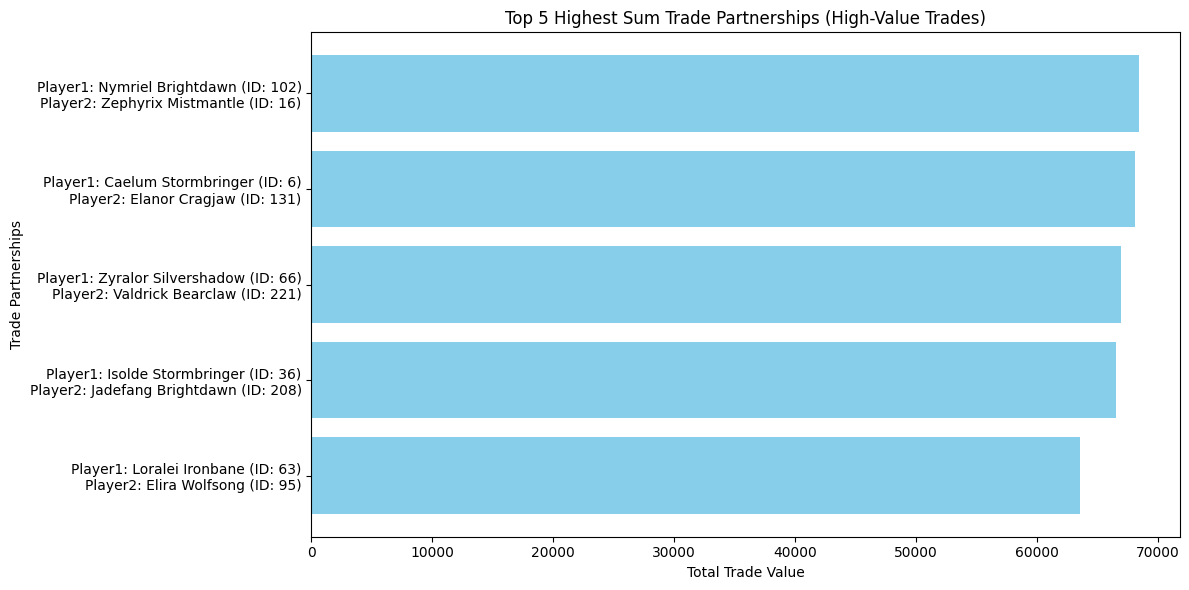

In [42]:
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}

import matplotlib.pyplot as plt
import mysql.connector

# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Query trade data including seller ID, buyer ID, and trade price
query = "SELECT SellerID, BuyerID, Price FROM trade"
cursor.execute(query)
trade_data = cursor.fetchall()

# Create a dictionary to store the total trade value for each partnership
partnership_totals = {}

# Define a threshold for high-value trades (e.g., trades above a certain price)
high_value_threshold = 7500  # Adjust as needed

# Iterate through trade data to calculate the total trade value for each partnership
for trade in trade_data:
    seller_id, buyer_id, price = trade
    if price >= high_value_threshold:
        partnership = (seller_id, buyer_id)
        partnership_totals[partnership] = partnership_totals.get(partnership, 0) + price

# Sort the partnership totals by total trade value in descending order
sorted_partnerships = sorted(partnership_totals.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 highest sum trade partnerships
top_5_partnerships = sorted_partnerships[:5]

# Create separate lists for seller and buyer names
seller_names = []
buyer_names = []

for (seller_id, buyer_id), _ in top_5_partnerships:
    # Query first names and last names for seller and buyer
    query_names = "SELECT first_name, last_name FROM characters WHERE id IN (%s, %s)"
    cursor.execute(query_names, (seller_id, buyer_id))
    names_data = cursor.fetchall()
    
    # Extract first names and last names
    seller_name = f"{names_data[0][0]} {names_data[0][1]}"
    buyer_name = f"{names_data[1][0]} {names_data[1][1]}"
    
    seller_names.append(seller_name)
    buyer_names.append(buyer_name)

# Extract the data for the bar chart
total_values = [total_value for _, total_value in top_5_partnerships]

# Create a bar chart to visualize the top 5 highest sum trade partnerships
plt.figure(figsize=(12, 6))
partnership_labels = [f"Player1: {seller_names[i]} (ID: {top_5_partnerships[i][0][0]})\nPlayer2: {buyer_names[i]} (ID: {top_5_partnerships[i][0][1]})" for i in range(5)]
plt.barh(partnership_labels, total_values, color='skyblue')
plt.xlabel('Total Trade Value')
plt.ylabel('Trade Partnerships')
plt.title('Top 5 Highest Sum Trade Partnerships (High-Value Trades)')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.tight_layout()

# Show the bar chart
plt.show()

# Close the database connection
conn.close()


Q6: PvP Rankings: List players based on their performances in
player-versus-player battles, potentially subdividing by various metrics like
number of wins, kill-to-death ratio, etc.

Create some data for the combats table. The gold amount will also change in the characters table accordingly, after winning/loosing a fight. Also we made it more likely for higher level players to win the fight.

In [9]:
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}


# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# List of possible character IDs
character_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 21, 22, 23, 25, 26, 28, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 50, 51, 52, 53, 55, 56, 58, 60, 62, 63, 64, 66, 67, 69, 70, 71, 72, 74, 75, 77, 78, 80, 81, 82, 83, 85, 87, 89, 90, 93, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 109, 110, 112, 113, 114, 116, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 140, 142, 145, 148, 149, 150, 152, 154, 155, 156, 157, 158, 161, 164, 167, 170, 172, 173, 175, 176, 179, 182, 184, 187, 190, 191, 192, 193, 196, 199, 202, 204, 206, 208, 209, 211, 212, 213, 214, 215, 217, 220, 221, 224, 225, 226, 229, 232, 234, 235, 237, 238, 239, 241, 243, 246, 247, 249, 252, 255, 258, 261, 263, 264, 265, 268, 270, 272, 275, 277, 279, 281, 991]

# Date range for timestamps
start_date = datetime(2021, 1, 1)
end_date = datetime(2023, 10, 20)

# Iterate to insert random combat records
for _ in range(1000):  # Adjust the number of records as needed
    attacker_id = random.choice(character_ids)
    defender_id = random.choice(character_ids)

    # Ensure attacker and defender are different characters
    while attacker_id == defender_id:
        defender_id = random.choice(character_ids)

    # Query levels and gold of the attacker and defender
    cursor.execute("SELECT level, gold FROM characters WHERE id = %s", (attacker_id,))
    attacker_data = cursor.fetchone()
    attacker_level = attacker_data[0]
    attacker_gold = attacker_data[1]

    cursor.execute("SELECT level, gold FROM characters WHERE id = %s", (defender_id,))
    defender_data = cursor.fetchone()
    defender_level = defender_data[0]
    defender_gold = defender_data[1]

    # Calculate the win probability based on level difference
    level_difference = attacker_level - defender_level
    win_probability = 0.5 + level_difference * 0.05  # Adjust as needed --> higher win probability if higher level

    # Generate a random number to determine the outcome
    if random.random() <= win_probability:
        outcome = "Win"
        gold_won = random.randint(500, 1500)
        # Check if attacker would have negative gold, if not, add the gold
        if (gold_won + attacker_gold) >= 0:
            cursor.execute("UPDATE characters SET gold = gold + %s WHERE id = %s", (gold_won, attacker_id))
            # Deduct the gold from the defender's gold amount
            cursor.execute("UPDATE characters SET gold = gold - %s WHERE id = %s", (gold_won, defender_id))
    else:
        outcome = "Loss"
        gold_won = random.randint(-1500, -500)
        # Check if defender would have negative gold, if not, add the gold
        if (gold_won + defender_gold) >= 0:
            cursor.execute("UPDATE characters SET gold = gold + %s WHERE id = %s", (-gold_won, defender_id))
            # Deduct the gold from the attacker's gold amount
            cursor.execute("UPDATE characters SET gold = gold - %s WHERE id = %s", (-gold_won, attacker_id))

    # Introduce a 5% chance of a tie (Outcome is "Tie" and gold_won is 0)
    if random.random() <= 0.05:
        outcome = "Tie"
        gold_won = 0

    # Generate a random number of turns
    turn = random.randint(2, 15)

    # Generate a random timestamp within the date range
    random_timestamp = start_date + timedelta(
        days=random.randint(0, (end_date - start_date).days),
        seconds=random.randint(0, 24 * 60 * 60 - 1)
    )

    insert_query = """
    INSERT INTO combats (Attacker, Defender, Outcome, Timestamp, gold_won, turn)
    VALUES (%s, %s, %s, %s, %s, %s)
    """
    # Execute the INSERT query with the generated values
    cursor.execute(insert_query, (attacker_id, defender_id, outcome, random_timestamp, gold_won, turn))

    # Commit the changes to the database after each combat
    conn.commit()

# Close the database connection
conn.close()


In [27]:
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}



# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Define the SQL query to calculate wins and losses for each player
wins_query = """
    SELECT 
        p.id AS PlayerID, 
        p.first_name AS FirstName, 
        p.last_name AS LastName, 
        SUM(CASE 
            WHEN (c.attacker = p.id AND c.outcome = 'Win') OR (c.defender = p.id AND c.outcome = 'Loss') THEN 1 
            ELSE 0 
        END) AS Wins,
        SUM(CASE 
            WHEN (c.attacker = p.id AND c.outcome = 'Loss') OR (c.defender = p.id AND c.outcome = 'Win') THEN 1 
            ELSE 0 
        END) AS Losses
    FROM characters AS p
    LEFT JOIN combats AS c ON p.id = c.attacker OR p.id = c.defender
    GROUP BY p.id, p.first_name, p.last_name
"""

# Execute the query to get wins and losses data
cursor.execute(wins_query)
wins_result = cursor.fetchall()

# Calculate the WinLossRatio and format it
ratio_result = [(row[0], row[1], row[2], row[3] / (row[3] + row[4])) if (row[3] + row[4]) > 0 else (row[0], row[1], row[2], 0) for row in wins_result]

# Create dataframes from the results with correct column names
wins_df = pd.DataFrame(wins_result, columns=["PlayerID", "FirstName", "LastName", "Wins", "Losses"])
ratio_df = pd.DataFrame(ratio_result, columns=["PlayerID", "FirstName", "LastName", "WinLossRatio"])

# Print the dataframes
print("High Score Table - Number of Wins and Losses")
print(wins_df)
print("\nHigh Score Table - Win-Loss Ratio")
print(ratio_df)

# Close the database connection
conn.close()

High Score Table - Number of Wins and Losses
     PlayerID FirstName     LastName Wins Losses
0           1    Aerith   Windrunner   15      5
1           2   Shaelis  Flamestrike   10     13
2           3    Aralyn  Steelstrike   17      5
3           4  Valyndra     Snowfall   16      6
4           5   Oberion    Starflame   19      4
..        ...       ...          ...  ...    ...
171       275    Daelis    Frostclaw   16      6
172       277   Aeriana  Stoneshield    1     18
173       279     Veyla     Ironsong   19      4
174       281   Thaelis    Glowspark    5      6
175       991    Brutus     Brutalus   13     16

[176 rows x 5 columns]

High Score Table - Win-Loss Ratio
     PlayerID FirstName     LastName                     WinLossRatio
0           1    Aerith   Windrunner                             0.75
1           2   Shaelis  Flamestrike   0.4347826086956521739130434783
2           3    Aralyn  Steelstrike   0.7727272727272727272727272727
3           4  Valyndra     

In [28]:
# Sort the dataframes by total wins and win-loss ratio in descending order
top_10_wins = wins_df.sort_values(by="Wins", ascending=False).head(10)
top_10_ratio = ratio_df.sort_values(by="WinLossRatio", ascending=False).head(10)

# Print the top 10 records for total wins
print("Top 10 Players by Total Wins:")
print(top_10_wins)

# Print the top 10 records for win-loss ratio
print("\nTop 10 Players by Win-Loss Ratio:")
print(top_10_ratio)

Top 10 Players by Total Wins:
     PlayerID  FirstName      LastName Wins Losses
17         21    Oberion  Deathbringer   30      5
5           6     Caelum  Stormbringer   29      0
68         93    Shaelis      Ironbane   29      0
163       258    Saphyra      Ironsong   27      4
52         69      Elira     Sunshield   26      4
128       191   Valyndra    Dawnstrike   25      2
48         63    Loralei      Ironbane   25      1
57         75  Solandria    Swiftblade   24      2
56         74    Nymriel      Darkfall   24      5
37         47    Thorgal    Silvermoon   24      1

Top 10 Players by Win-Loss Ratio:
     PlayerID  FirstName      LastName                    WinLossRatio
126       187  Serafelle    Dawnstrike                               1
5           6     Caelum  Stormbringer                               1
148       226    Zephyra    Silvermoon                               1
68         93    Shaelis      Ironbane                               1
108       150   Zan

In [5]:
connection = mysql.connector.connect(
    host = 'localhost',
    user= 'root',
    password= '11Mfld11',
    database= 'mystic_schema')

cursor = connection.cursor()


# SQL statement to create the 'sessions' table
create_table_sql = """
CREATE TABLE sessions (
    session_id INT AUTO_INCREMENT PRIMARY KEY,
    player_id INT,
    starttime DATETIME,
    endtime DATETIME,
    FOREIGN KEY (player_id) REFERENCES players(PlayerID)
)
"""
cursor.execute(create_table_sql)

# Commit the transaction
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

In [8]:
#generate sessions

# Define the number of rows you want for the DataFrame
num_rows = 2000

# Generate random player_ids (assuming you have a maximum of 100 players for simplicity)
player_ids = np.random.randint(1, 71, num_rows)

# Generate random start times between '2021-01-01' and '2022-12-31'
start_dates = pd.date_range('2021-01-01', '2022-12-31', freq='T').to_list()
random_start_times = np.random.choice(start_dates, num_rows)
random_start_times = [time + timedelta(minutes=np.random.randint(0, 60), seconds=np.random.randint(0, 60)) for time in random_start_times]

# Calculate random end times, ensuring that the session is no longer than 8 hours
random_time_deltas = [timedelta(hours=np.random.randint(0, 9), minutes=np.random.randint(0, 60), seconds=np.random.randint(0, 60)) for _ in range(num_rows)]
end_times = [start + delta for start, delta in zip(random_start_times, random_time_deltas)]

# Filter out those entries where end times have exceeded '2023-01-01'
filtered_indices = [index for index, time in enumerate(end_times) if time <= datetime(2023, 1, 1)]
player_ids = np.array(player_ids)[filtered_indices]
random_start_times = np.array(random_start_times)[filtered_indices]
end_times = np.array(end_times)[filtered_indices]

# Construct the DataFrame
sessions_df = pd.DataFrame({
    'player_id': player_ids,
    'starttime': random_start_times,
    'endtime': end_times
})


# Generate 50 anomalous start times
anomalous_start_times = np.random.choice(start_dates, 50)
anomalous_start_times = [time + timedelta(minutes=np.random.randint(0, 60), seconds=np.random.randint(0, 60)) for time in anomalous_start_times]

# Calculate anomalous end times, ensuring that the session is between 8 and 24 hours
anomalous_time_deltas = [timedelta(hours=np.random.randint(8, 25), minutes=np.random.randint(0, 60), seconds=np.random.randint(0, 60)) for _ in range(50)]
anomalous_end_times = [start + delta for start, delta in zip(anomalous_start_times, anomalous_time_deltas)]

# Generate player_ids for the anomalous entries
anomalous_player_ids = np.random.randint(1, 71, 50)

# Construct the DataFrame for anomalies
anomalies_df = pd.DataFrame({
    'player_id': anomalous_player_ids,
    'starttime': anomalous_start_times,
    'endtime': anomalous_end_times
})

# Concatenate the original sessions_df with the anomalies_df
sessions_df = pd.concat([sessions_df, anomalies_df], ignore_index=True)

In [9]:
connection = mysql.connector.connect(
    host = 'localhost',
    user= 'root',
    password= '11Mfld11',
    database= 'mystic_schema')

cursor = connection.cursor()

for index, row in sessions_df.iterrows():
    sql = """
    INSERT INTO sessions (player_id, starttime, endtime)
    VALUES (%s, %s, %s)
    """
    
    values = (row['player_id'], row['starttime'], row['endtime'])
    cursor.execute(sql, values)

# Commit the transaction
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

Q7: Players: Player Retention: Analyze the average session length and frequency for each player to identify patterns in player retention.

In [10]:
connection = mysql.connector.connect(
    host = 'localhost',
    user= 'root',
    password= '11Mfld11',
    database= 'mystic_schema')


# Create a cursor object
cursor = connection.cursor(dictionary=True)

# Query to fetch all data from the sessions table
query = """SELECT player_id, ROUND(AVG(TIMESTAMPDIFF(SECOND, starttime, endtime)/3600), 2) AS avg_session_length_hours,
        COUNT(*) AS session_count FROM sessions GROUP BY player_id;""" # round it

# Execute the query
cursor.execute(query)

# Fetch the results
result = cursor.fetchall()

# Close the cursor
cursor.close()

result = pd.DataFrame(result)
result

,player_id,avg_session_length_hours,session_count
0,1,4.53,35
1,2,5.24,23
2,3,3.95,22
3,4,4.88,31
4,5,4.28,35
...,...,...,...
65,66,4.54,34
66,67,5.29,30
67,68,4.16,20
68,69,4.97,23


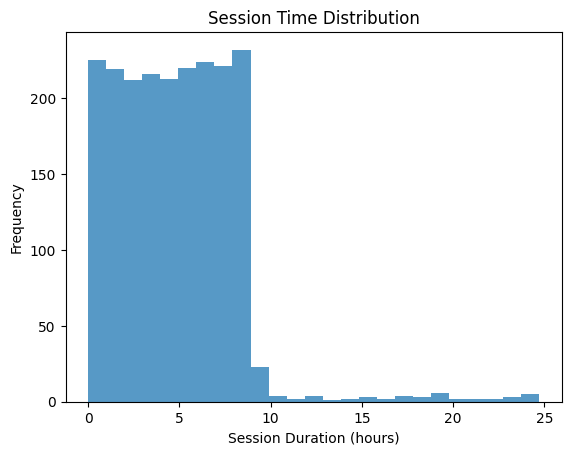


Average Session Length (hours): 4.8311468834688345


In [25]:

# Calculate session duration in hours and add it as a new column
sessions_df['session_duration_hours'] = (pd.to_datetime(sessions_df['endtime']) - pd.to_datetime(sessions_df['starttime'])).dt.total_seconds() / 3600

# Find the 5 longest and shortest sessions
longest_sessions = sessions_df.nlargest(5, 'session_duration_hours')
shortest_sessions = sessions_df.nsmallest(5, 'session_duration_hours')

# Calculate the average session length in hours
avg_session_length_hours = sessions_df['session_duration_hours'].mean()

# Calculate total playtime for each player in hours
total_playtime = sessions_df.groupby('player_id')['session_duration_hours'].sum().reset_index()

# Find the 5 players with the highest and lowest playtime
top_players = total_playtime.nlargest(5, 'session_duration_hours')
bottom_players = total_playtime.nsmallest(5, 'session_duration_hours')

# Visualize the session time distribution (histogram)
plt.hist(sessions_df['session_duration_hours'], bins=25, alpha=0.75)
plt.title('Session Time Distribution')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Frequency')
plt.show()

# Calculate the total played time in hours (sum of all session lengths)
total_played_time_hours = sessions_df['session_duration_hours'].sum()

print("\nAverage Session Length (hours):", avg_session_length_hours)

In [24]:
# Print the results
print("5 Longest Sessions:")
print(longest_sessions)

print("\n5 Shortest Sessions:")
print(shortest_sessions)



5 Longest Sessions:
      player_id           starttime             endtime  session_duration   
2025         21 2022-08-16 00:25:50 2022-08-17 01:08:39           88969.0  \
2044         70 2022-07-19 20:21:28 2022-07-20 20:59:38           88690.0   
2040         24 2022-01-04 13:30:38 2022-01-05 13:55:10           87872.0   
2023         20 2021-11-05 20:00:41 2021-11-06 20:01:44           86463.0   
2008         53 2021-04-20 00:46:27 2021-04-21 00:31:38           85511.0   

      session_duration_hours  
2025               24.713611  
2044               24.636111  
2040               24.408889  
2023               24.017500  
2008               23.753056  

5 Shortest Sessions:
      player_id           starttime             endtime  session_duration   
1365         18 2021-07-24 12:08:39 2021-07-24 12:08:48               9.0  \
329          30 2021-02-13 04:58:36 2021-02-13 04:59:26              50.0   
1172         16 2022-06-09 15:11:44 2022-06-09 15:12:39              55.0   
1

In [21]:
# Calculate total playtime for each player in hours
total_playtime = sessions_df.groupby('player_id')['session_duration_hours'].sum().reset_index()

# Find the players with the highest and lowest playtime
top_players = total_playtime.nlargest(5, 'session_duration_hours')
bottom_players = total_playtime.nsmallest(5, 'session_duration_hours')

# Print the results
print("Players with Highest Playtime:")
print(top_players)

print("\nPlayers with Lowest Playtime:")
print(bottom_players)


Players with Highest Playtime:
    player_id  session_duration_hours
47         48              246.903611
46         47              203.201667
34         35              193.182222
19         20              184.010556
55         56              183.119167

Players with Lowest Playtime:
    player_id  session_duration_hours
17         18               80.462222
67         68               83.248056
2           3               86.853889
26         27               91.206944
60         61               96.828611


Q8: Time of Play: Find out what times of day are the most popular for playing, which could help in scheduling in-game events or maintenance.

<Figure size 1200x600 with 0 Axes>

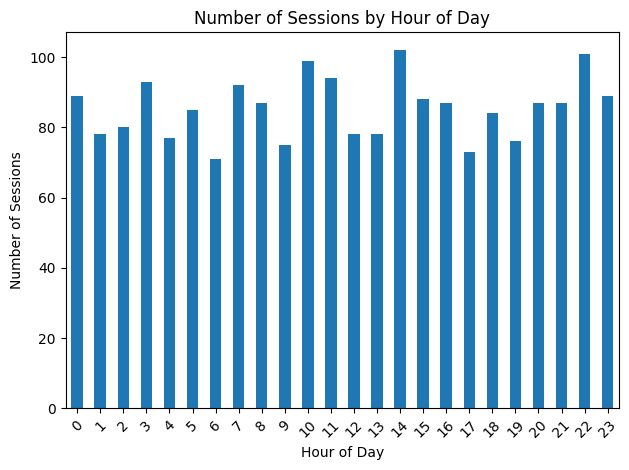

In [27]:
connection = mysql.connector.connect(
    host = 'localhost',
    user= 'root',
    password= '11Mfld11',
    database= 'mystic_schema')


# Create a cursor object
cursor = connection.cursor(dictionary=True)

# Query to fetch popular times of day for playing
query = """
SELECT HOUR(starttime) AS hour_of_day, COUNT(*) AS session_count
FROM sessions
GROUP BY HOUR(starttime)
ORDER BY hour_of_day;
"""

# Execute the query
cursor.execute(query)

# Fetch the results
result = cursor.fetchall()

# Close the cursor
cursor.close()

# Convert the result to a pandas DataFrame
result = pd.DataFrame(result)

# Ensure all hours are present in the result
result = result.reindex(range(24), fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
result.plot(x="hour_of_day", y="session_count", kind="bar", legend=False)
plt.title("Number of Sessions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Sessions")
plt.xticks(range(24), rotation=45)
plt.tight_layout()
plt.show()

Q9: Chat Metrics: Calculate the average number of messages per minute sent in each chat room between 8 PM and 9 PM.

In [28]:
possible_messages = [
    "Hey, everyone! How's everyone doing today?",
    "What games are you all currently playing?",
    "Ready to jump into some gaming action?",
    "How's your day been so far, fellow gamers?",
    "Who's up for some fun gaming sessions?",
    "Anyone here for a chat or a game?",
    "What's your go-to game to unwind after a long day?",
    "Looking to make some new gaming buddies. Who's in?",
    "Who's excited to explore new game worlds?",
    "What's on your gaming agenda for today?",
    "Time for a quick game or just a casual conversation?",
    "Who's online and ready to have a blast?",
    "What's the latest gaming news that caught your attention?",
    "Share your gaming achievements or milestones!",
    "Ready to embark on some epic gaming adventures?",
    "Any game recommendations for today?",
    "Who's in the mood for some multiplayer action?",
    "What's your favorite gaming snack or beverage?",
    "Looking for some gaming company. Join me!",
    "What's the most memorable gaming moment you've had recently?",
    "Calling all adventurers! Join us in our quest to conquer formidable foes and daunting Challenges.",
    "Discussing the art of teamwork when facing Bosses and overcoming game Challenges.",
    "Share your most exhilarating victories and epic fails in Boss battles and Challenges.",
    "Looking to form a formidable squad for taking on the game's toughest trials.",
    "What's your favorite part about tackling challenging Bosses and completing game Challenges?",
    "Ready to strategize and dominate the most challenging aspects of our favorite game.",
    "Let's swap stories about our most memorable encounters with tough game content.",
    "Any tips for newcomers trying to overcome their first Boss or Challenge?",
    "Who enjoys the rush of adrenaline when facing a fierce Boss or nail-biting Challenge?",
    "Discussing the satisfaction of defeating a challenging Boss or completing a difficult Challenge.",
    "Looking for like-minded players who relish the thrill of overcoming game obstacles.",
    "Share your thoughts on the game's difficulty levels and the thrill of conquering them.",
    "Ready to embark on a journey to conquer the game's toughest adversaries and Challenges?",
    "What's your go-to strategy when you find yourself facing a formidable Boss?",
    "Join us for a friendly competition: Who can complete the most Challenges this week?",
    "Discussing the sense of achievement that comes with conquering Bosses and Challenges.",
    "Seeking fellow adventurers to join our party for epic Boss encounters and Challenges.",
    "Share your favorite in-game items or abilities for dealing with Bosses and Challenges.",
    "Who here enjoys theorycrafting and strategizing for upcoming Boss fights and Challenges?",
    "Ready for a night of intense gaming, tackling Bosses and conquering Challenges?",
    "Who's up for tackling a tough Boss or Challenge today? Let's assemble a team!",
    "Discussing strategies to conquer those challenging Bosses and tough game Challenges.",
    "Share your tips for overcoming the most challenging game Bosses.",
    "Looking for advice on how to beat the game's toughest Challenges.",
    "Ready to take on some epic Boss battles or daunting Challenges together?",
    "What's your preferred approach when facing Bosses or tricky game Challenges?",
    "Any memorable victories against Bosses or completing Challenges you'd like to share?",
    "Who here enjoys a good challenge in-game? Let's talk about our experiences.",
    "Share your strategies for staying calm and focused during intense Boss fights.",
    "Looking for fellow gamers to team up and tackle Bosses and Challenges!"
]

chat_room_ids = [1, 4, 5, 6, 10, 11]
user_ids = [
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 21, 22, 23, 25, 26, 28, 30, 31, 32, 33, 35, 36, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 50, 51, 52, 53, 55, 56, 58, 60, 62, 63, 64, 66, 67, 69, 70, 71, 72, 74, 75, 77, 78, 80, 81, 82, 83, 85, 87, 89, 90, 93, 95, 96, 97, 98, 100, 101, 102, 103, 105, 106, 107, 109, 110, 112, 113, 114, 116, 119, 120, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 140, 142, 145, 148, 149, 150, 152, 154, 155, 156, 157, 158, 161, 164, 167, 170, 172, 173, 175, 176, 179, 182, 184, 187, 190, 191, 192, 193, 196, 199, 202, 204, 206, 208, 209, 211, 212, 213, 214, 215, 217, 220, 221, 224, 225, 226, 229, 232, 234, 235, 237, 238, 239, 241, 243, 246, 247, 249, 252, 255, 258, 261, 263, 264, 265, 268, 270, 272, 275, 277, 279, 281, 991
]


In [31]:
connection = mysql.connector.connect(
    host = 'localhost',
    user= 'root',
    password= '11Mfld11',
    database= 'mystic_schema')

cursor = connection.cursor()

num_messages = 1000

for _ in range(num_messages):
    # Randomly select chat room ID, user ID, and message from the given lists
    chat_room_id = random.choice(chat_room_ids)
    user_id = random.choice(user_ids)
    message = random.choice(possible_messages)

    # Generate random timestamp between 2021-01-01 and 2023-01-01
    start_date = datetime(2021, 1, 1)
    end_date = datetime(2023, 1, 1)
    random_timestamp = start_date + (end_date - start_date) * random.random()

    # SQL query to insert random data into chatmessages table
    query = """
    INSERT INTO chatmessages (ChatRoomID, UserID, MessageContent, Timestamp)
    VALUES (%s, %s, %s, %s)
    """
    cursor.execute(query, (chat_room_id, user_id, message, random_timestamp))

# Commit changes to the database
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

In [32]:
connection = mysql.connector.connect(
    host = 'localhost',
    user= 'root',
    password= '11Mfld11',
    database= 'mystic_schema')

cursor = connection.cursor(dictionary=True)

# Query to fetch average messages per minute for each chat room between 8 PM and 9 PM
query = """
    SELECT 
        ChatRoomID,
        COUNT(MessageID) as total_messages,
        COUNT(MessageID) / 60 as avg_messages_per_minute
    FROM chatmessages
    WHERE HOUR(Timestamp) = 20
    GROUP BY ChatRoomID;
    """

# Execute the query
cursor.execute(query)

# Fetch the results
result = cursor.fetchall()

# Close the cursor
cursor.close()

# Close the connection
connection.close()

result = pd.DataFrame(result)
result

,ChatRoomID,total_messages,avg_messages_per_minute
0,1,11,0.1833
1,4,21,0.3500
2,5,19,0.3167
3,6,15,0.2500
4,10,11,0.1833
5,11,11,0.1833


Q10: Guild Affiliation: Examine the distribution of players in various guilds to find out which guilds are the most popular or exclusive.

In [33]:
connection = mysql.connector.connect(
    host = 'localhost',
    user= 'root',
    password= '11Mfld11',
    database= 'mystic_schema')


# Create a cursor object
cursor = connection.cursor()

sql = """
SELECT 
    pwg.guild_id,
    gn.name AS GuildName,
    COUNT(DISTINCT ch.player_id) AS unique_player_count
FROM 
    player_with_guild AS pwg
JOIN 
    characters AS ch ON pwg.character_id = ch.id
LEFT JOIN 
    guildname AS gn ON pwg.guild_id = gn.id
GROUP BY 
    pwg.guild_id, gn.name
ORDER BY 
    unique_player_count DESC;
"""

cursor.execute(sql)

# Fetching and printing the results
result = cursor.fetchall()
result = pd.DataFrame(result, columns=['Guild ID', 'Guild Name', 'Unique Player Count'])

# Closing the connection
cursor.close()

# Display the result
print(result)

#the unique player count differs from the one in the members column from the teamnames table, as the members numbers were given to us
#by the generated_entities.txt but we created this analyiss for the players from the generated_events.txt data, as both of these given
#files differed from their data we decided to use this one


     Guild ID            Guild Name  Unique Player Count
0         321     Heroes of Harmony                   22
1         183      Circle of Druids                   20
2         217      Merchant Princes                   20
3          10  The Silent Footsteps                   19
4          41      Prophets of Doom                   19
..        ...                   ...                  ...
164       272         Desert Nomads                    9
165       338        Frostbite Clan                    9
166        50     Archmage Assembly                    7
167       185      Mind Over Matter                    6
168       276         Hands of Fate                    6

[169 rows x 3 columns]


Q11: High Dropout Rates: Find quests with a high start but low completion rate,
which might indicate they are too difficult or not engaging.

In [34]:
connection = mysql.connector.connect(
    host = 'localhost',
    user= 'root',
    password= '11Mfld11',
    database= 'mystic_schema')


cursor = connection.cursor()

sql = """
CREATE TABLE player_with_quest (
    id INT AUTO_INCREMENT PRIMARY KEY,
    character_id INT NOT NULL,
    quest_id INT NOT NULL,
    timestamp DATETIME NOT NULL,
    value ENUM('started', 'completed') NOT NULL,
    FOREIGN KEY (character_id) REFERENCES characters(id),
    FOREIGN KEY (quest_id) REFERENCES quests(QuestID)
);
"""

cursor.execute(sql)

connection.commit()

cursor.close()
connection.close()

In [35]:
# Set a seed for reproducibility
np.random.seed(42)

# Generate random data
num_entries = 5000
character_ids = np.random.choice(user_ids, num_entries)
quest_ids = np.random.randint(1, 11, num_entries)
start_date = datetime(2021, 1, 1)
end_date = datetime(2023, 1, 1)
date_range = (end_date - start_date).days
timestamps = [
    start_date + timedelta(
        days=np.random.randint(0, date_range),
        hours=np.random.randint(0, 24),
        minutes=np.random.randint(0, 60),
        seconds=np.random.randint(0, 60)
    ) for _ in range(num_entries)
]
values = ['Started'] * num_entries

# Create DataFrame
quest_events_df = pd.DataFrame({
    'character_id': character_ids,
    'quest_id': quest_ids,
    'timestamp': timestamps,
    'value': values
})

# Drop duplicates based on character_id and quest_id
quest_events_df = quest_events_df.drop_duplicates(subset=['character_id', 'quest_id'])

# Optionally, you can shuffle the rows to make the data more random
quest_events_df = quest_events_df.sample(frac=1).reset_index(drop=True)

In [36]:
# Sample 60% of the original DataFrame
sample_df = quest_events_df.sample(frac=0.7).reset_index(drop=True)

# Add delta to the timestamps
deltas = [
    timedelta(
        days=np.random.randint(0, 30),
        hours=np.random.randint(0, 24),
        minutes=np.random.randint(0, 60),
        seconds=np.random.randint(0, 60)
    ) for _ in range(len(sample_df))
]

sample_df['timestamp'] = sample_df['timestamp'] + pd.Series(deltas)
sample_df['value'] = 'Completed'

# Concatenate the original DataFrame with the new rows
quest_events_df = pd.concat([quest_events_df, sample_df]).reset_index(drop=True)

# Ensure there are no duplicates
quest_events_df = quest_events_df.drop_duplicates(subset=['character_id', 'quest_id', 'value'])

In [37]:
quest_events_df

,character_id,quest_id,timestamp,value
0,232,3,2022-10-13 05:19:34,Started
1,41,5,2022-06-16 17:35:27,Started
2,85,3,2022-05-30 19:40:34,Started
3,220,2,2022-05-19 14:47:48,Started
4,90,8,2022-10-16 14:36:04,Started
...,...,...,...,...
2814,8,7,2022-12-29 11:53:00,Completed
2815,263,2,2021-10-05 14:52:04,Completed
2816,199,5,2021-10-11 11:13:20,Completed
2817,52,6,2022-07-08 13:39:04,Completed


In [39]:
#populate
connection = mysql.connector.connect(
    host = 'localhost',
    user= 'root',
    password= '11Mfld11',
    database= 'mystic_schema')

cursor = connection.cursor()

for _, row in quest_events_df.iterrows():
    sql = """INSERT INTO player_with_quest (character_id, quest_id, timestamp, value) 
             VALUES (%s, %s, %s, %s)"""
    cursor.execute(sql, (row['character_id'], row['quest_id'], row['timestamp'], row['value']))

# Commit the changes
connection.commit()

In [43]:
connection = mysql.connector.connect(
    host = 'localhost',
    user= 'root',
    password= '11Mfld11',
    database= 'mystic_schema')

cursor = connection.cursor()

sql = """
SELECT 
    quest_id,
    SUM(CASE WHEN value = 'started' THEN 1 ELSE 0 END) as starts,
    SUM(CASE WHEN value = 'completed' THEN 1 ELSE 0 END) as completions,
    (SUM(CASE WHEN value = 'completed' THEN 1 ELSE 0 END) / SUM(CASE WHEN value = 'started'  THEN 1 ELSE 0 END)) as dropout_rate
FROM 
    player_with_quest
GROUP BY 
    quest_id
ORDER BY 
    dropout_rate DESC;
"""

cursor.execute(sql)

# Fetching and printing the results
result = cursor.fetchall()
result = pd.DataFrame(result, columns=['quest_id', 'started', 'completed', 'completion_rate'])
# Closing the connection
cursor.close()

True

In [44]:
result
# Quest 2 has the highest dropout rate (lowest completion), so it was the hardest quest to complete

,quest_id,started,completed,completion_rate
0,9,160,120,0.7500
1,10,170,125,0.7353
2,7,165,120,0.7273
3,3,164,118,0.7195
4,4,165,118,0.7152
5,8,164,115,0.7012
6,1,167,115,0.6886
7,5,166,111,0.6687
8,6,166,111,0.6687
9,2,171,108,0.6316


Q12: Quest Completions Over Time: Track the rate at which quests are being
completed over time, possibly to identify if certain events or updates make
them more or less popular.

In [45]:
connection = mysql.connector.connect(
    host = 'localhost',
    user= 'root',
    password= '11Mfld11',
    database= 'mystic_schema')

cursor = connection.cursor()

sql = """
SELECT 
    quest_id,
    DATE(timestamp) as quest_date,
    COUNT(DISTINCT CASE WHEN value = 'Completed' THEN character_id END) as completions
FROM 
    player_with_quest
WHERE 
    value = 'Completed'
GROUP BY 
    quest_id, quest_date
ORDER BY 
    quest_id, quest_date;
"""

cursor.execute(sql)

# Fetching and printing the results
result = cursor.fetchall()
result = pd.DataFrame(result, columns=['quest_id', 'quest_date', 'completions'])
# Closing the connection
cursor.close()

True

Q13: Market Hotspots: Find locations in the game where the most transactions or
trades occur. This could indicate an in-game market or a hotspot for trading.

In [47]:
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}

# Connect to the MySQL database
conn = mysql.connector.connect(**db_config)
cursor = conn.cursor()

# Define the ALTER TABLE statement to add the Location column
alter_table_query = """
ALTER TABLE trade
ADD COLUMN Location VARCHAR(255) NULL;
"""

# Execute the ALTER TABLE statement
cursor.execute(alter_table_query)

# Commit the changes and close the connection
conn.commit()
conn.close()

In [50]:
# Define trading locations and their popularity weights
trading_locations = [
    ("Trade Outpost", 1),       
    ("Merchant's Square", 1),   
    ("Market Street", 2),
    ("Trading Post", 2),
    ("Exchange Plaza", 3),       
    ("Auction House", 3),       
    ("Black Market", 3),        
]

# Create a list to store the assigned trading locations
assigned_locations = []


# Connect to the MySQL database
conn = mysql.connector.connect(
    host = 'localhost',
    user= 'root',
    password= '11Mfld11',
    database= 'mystic_schema')

# Create a cursor object
cursor = conn.cursor()

# Update the "trade" table with the assigned trading locations
update_query = "UPDATE trade SET location = %s WHERE TradeID = %s"
cursor.execute("SELECT TradeID FROM trade")
trade_ids = [row[0] for row in cursor.fetchall()]

# Generate random trading locations based on weights
for trade_id in trade_ids:
    location = random.choices(trading_locations, weights=[weight for _, weight in trading_locations], k=1)[0][0]
    cursor.execute(update_query, (location, trade_id))

# Commit the changes and close the database connection
conn.commit()
conn.close()

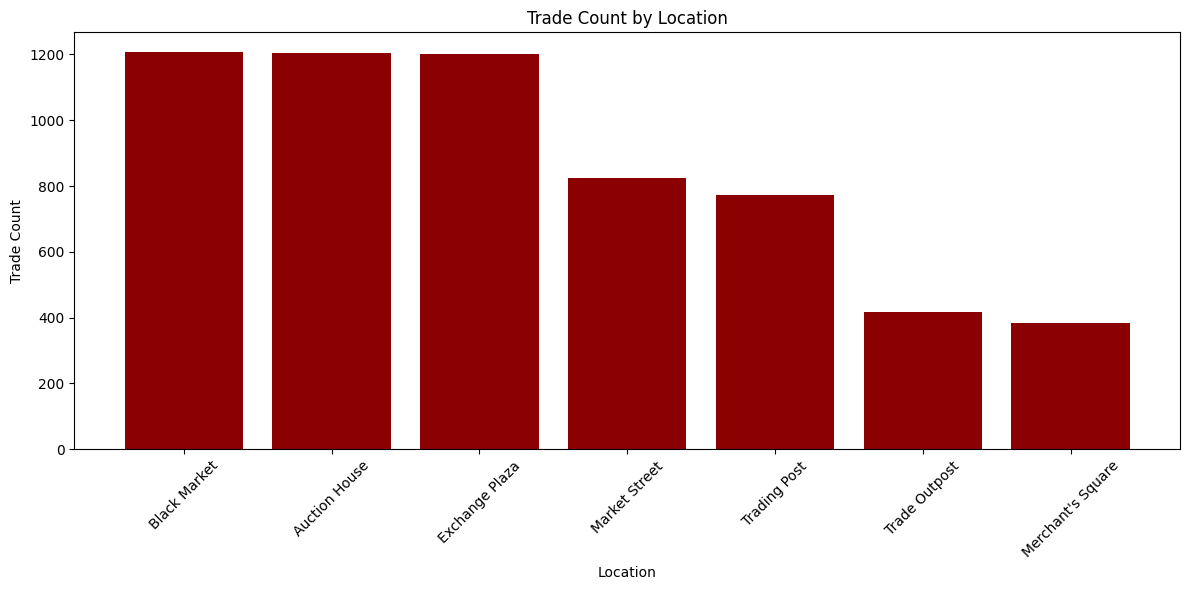

In [53]:
conn = mysql.connector.connect(
    host = 'localhost',
    user= 'root',
    password= '11Mfld11',
    database= 'mystic_schema')

# Create a cursor object
cursor = conn.cursor()

# Query to fetch the count of trades at each location
query = """
SELECT location, COUNT(*) AS trade_count
FROM trade
GROUP BY location
ORDER BY trade_count DESC;
"""

# Execute the query
cursor.execute(query)

# Fetch the results
results = cursor.fetchall()

# Close the cursor and the connection
cursor.close()
conn.close()

# Create a DataFrame from the results
df = pd.DataFrame(results, columns=["Location", "Trade Count"])

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(df["Location"], df["Trade Count"],color="darkred")
plt.title("Trade Count by Location")
plt.xlabel("Location")
plt.ylabel("Trade Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q14: Rare Item Ownership: List players who own the rarest items in the game,
possibly indicating either advanced game expertise or involvement in trading
networks.

In [56]:
#highest rarity is "legendary" in our case 

db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': '11Mfld11',
    'database': 'mystic_schema'
}


try:
    # Establish a connection to the database
    connection = mysql.connector.connect(**db_config)

    # Create a cursor object
    cursor = connection.cursor()

    # SQL query to find the top players with the most Legendary items
    query = """
    SELECT
        c.id AS CharacterID,
        c.first_name AS FirstName,
        c.last_name AS LastName,
        COUNT(*) AS LegendaryItemCount
    FROM
        characters c
    JOIN
        character_item_ownership cio ON c.id = cio.character_id
    JOIN
        item i ON cio.item_id = i.id
    WHERE
        i.rarity = 'Legendary'
    GROUP BY
        c.id, c.first_name, c.last_name
    ORDER BY
        LegendaryItemCount DESC
    LIMIT 5;
    """

    # Execute the query
    cursor.execute(query)

    # Fetch the results
    results = cursor.fetchall()

    # Print the top players with the most Legendary items
    print("Top 5 Players with the Most Legendary Items:")
    for rank, (character_id, first_name, last_name, legendary_count) in enumerate(results, start=1):
        print(f"{rank}. CharacterID: {character_id}, Name: {first_name} {last_name}, Legendary Items: {legendary_count}")

except mysql.connector.Error as e:
    print(f"Error: {e}")

finally:
    # Close the cursor and database connection
    if cursor:
        cursor.close()
    if connection:
        connection.close()

Top 5 Players with the Most Legendary Items:
1. CharacterID: 1, Name: Aerith Windrunner, Legendary Items: 25
2. CharacterID: 2, Name: Shaelis Flamestrike, Legendary Items: 25
3. CharacterID: 3, Name: Aralyn Steelstrike, Legendary Items: 25
4. CharacterID: 4, Name: Valyndra Snowfall, Legendary Items: 25
5. CharacterID: 5, Name: Oberion Starflame, Legendary Items: 25


Q15: 